# Assignment Details


*   Group Name: Group 247
*   Assignment Name: Wine Quality (Assignment 2-Problem statement 14)
*   Group Students Details:
   *   Mohammad Talha Rabbani Shaikh (2021FA04029)
   *   Ajeya B Jois (2021FA04033)
   *   Kumari Anshika (2021FA04019)

## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot as plt
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import random
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import classification_report


## 1. Data Visualization and Exploration

**Download Data:**  
Data has been downloaded from the given source and will be processed from the local file storage  
Path: ./winequality-req.csv

In [2]:
# Read data into pandas dataframe
df = pd.read_csv("./winequality-red.csv")

**Print 2 rows for sanity check to identify all the features present in the dataset and if the 
target matches with them.**

In [3]:
# print first 2 rows for sanity checks
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [4]:
# print shape of df
df.shape

(1599, 12)

In [5]:
# check data types of df
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
# check for missing values
df.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

**Observation:** 
   - _We can see that all the columns has 1599 count._ 
   - _Hence we can conclude that there are no missing values and also data type is also same for all the values_
   - _Data has 1599 records and 12 features inclusing label_ 

**Comment on class imbalance with appropriate visualization method.**

In [7]:
# find all classes and their count
class_count = df["quality"].value_counts()
print(class_count)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


<AxesSubplot:xlabel='quality', ylabel='Count'>

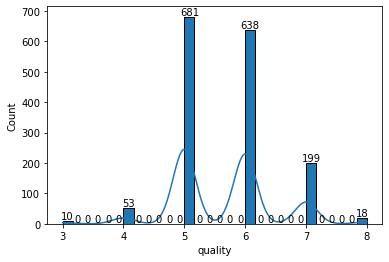

In [8]:
# check for imbalance 
ax = sns.histplot(
        data=df,
        x='quality',
        alpha=1, 
        kde=True,
        )
ax.bar_label(ax.containers[0])
ax

**Observation:**  
   - _We saw that there are 6 quality of wines ranging from 3 to 8_ 
   - _This is a problem of multiclass classification_
   - _Classes are imbalanced and we need to balance them for our modeling techniques_

### _Class Imbalancement_ (Part of Data Preprocessing)
<a id='class_imbalance'></a>


In [9]:
# Oversampling data to remove the imbalance of classes
# for this we will be using imblearn librearly and the 
# technique will SMOTE (Synthetic Minority Over-sampling Technique).
# this will sunthesize the new examples for the claases with
# low record count

oversample = SMOTE()

# split into input and output elements
X, y = df.iloc[:, :-1], df.iloc[:, -1]

X_resample, y_resample = oversample.fit_resample(X,y)

In [10]:
type(X_resample),type(y_resample)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [11]:
# output is in Pandas Series data type converting
# it to DataFrame and merging to a new df
df_resample = pd.concat(
                   [X_resample,y_resample.to_frame()], 
                   axis =1,
                   join='inner'
                )

In [12]:
df_resample

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4081,6.489552,0.432276,0.207295,2.542164,0.058019,22.639929,66.384341,0.993480,3.438153,0.836493,13.505224,8
4082,7.168323,0.548029,0.073521,2.162679,0.059233,32.352146,56.534975,0.993244,3.470986,0.761971,13.057035,8
4083,10.513159,0.573941,0.600912,4.585880,0.080243,7.727212,20.919125,0.998017,3.221919,0.703434,12.996984,8
4084,9.929264,0.587747,0.536958,4.111474,0.081968,6.806315,18.193685,0.996200,3.211937,0.702095,13.279053,8


In [13]:
# Now data has been euqally sampled. lets check 
# find all classes and their count after resampling
class_count = df_resample["quality"].value_counts()
print(class_count)

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64


<AxesSubplot:xlabel='quality', ylabel='Count'>

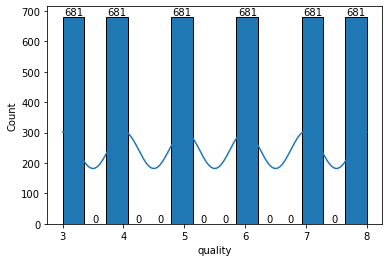

In [14]:
# check for imbalance after balancing
ax = sns.histplot(
        data=df_resample,
        x='quality',
        alpha=1, 
        kde=True,
        )
ax.bar_label(ax.containers[0])
ax

**Provide appropriate visualizations to get an insight about the dataset.** 

### _EDA_

_We know that visulizations speak now we will draw some vizs to explain data_

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

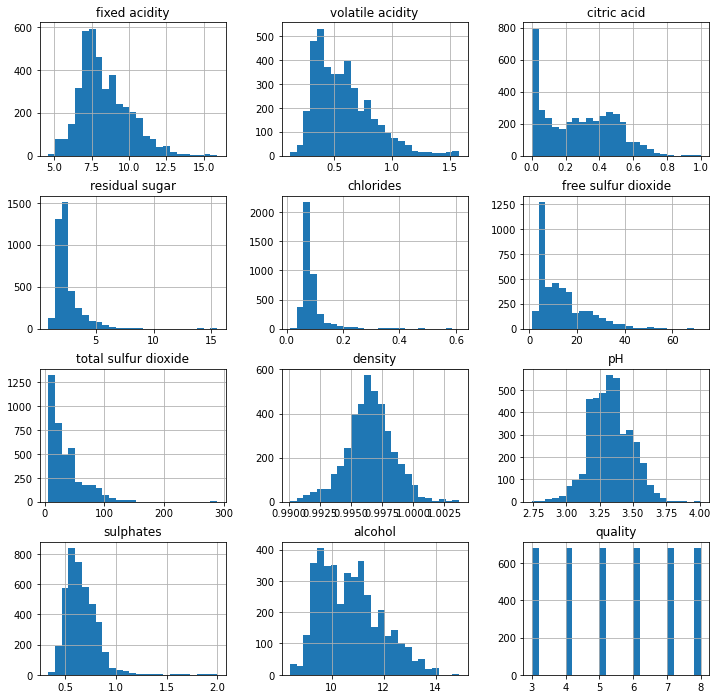

In [15]:
# drawing histogram of all features and labels
df_resample.hist(bins=25,figsize=(12,12))


**Observations:**
   - _The above image reveals that how data is easily distributed on features_
   - _we can see that alcohol and acidity have some co-relation on quality lets see them closely_
   

<AxesSubplot:title={'center':'Alcohol vs quality'}, xlabel='quality', ylabel='alcohol'>

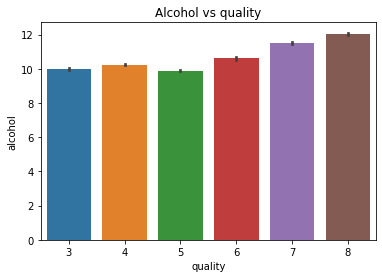

In [16]:
# Lets compare Alcohol and Quality of wine

ax2 = sns.barplot(x='quality',y='alcohol' , data=df_resample)
ax2.set(title="Alcohol vs quality")
ax2

**Observations:**
   - _We are assuming that 0 being the worst quality and 10 being high quality_
   - _In the above viz we are seeing that quality of wine increases as alcohol increases_
   - _Alcohol is proportonal to quality of wine_

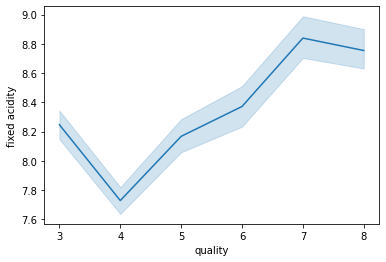

In [17]:
# Lets compare Fixed Acidity and Quality of wine

ax3 = sns.lineplot(x='quality',y='fixed acidity', data=df_resample)

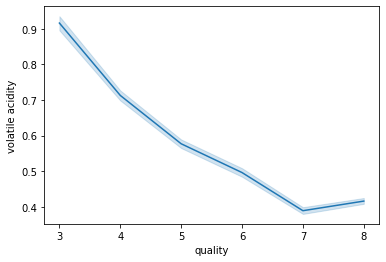

In [18]:
# Lets compare Volatile Acidity and Quality of wine

ax3 = sns.lineplot(x='quality',y='volatile acidity', data=df_resample)

**Observations:**
   - _We can see that fixed acidity increases and Volatile acidity decreases as the quality of Wine increases_

### _Co-relation Analysis_

In [19]:
# get co-relation matrix
corr = df_resample.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.322406,0.721526,0.088892,0.088561,-0.101124,-0.119071,0.638348,-0.713327,0.201056,-0.132226,0.179595
volatile acidity,-0.322406,1.000000,-0.645347,0.073311,0.194420,-0.194497,-0.136291,0.069248,0.474976,-0.454707,-0.259665,-0.684923
citric acid,0.721526,-0.645347,1.000000,0.081877,0.122296,0.039249,0.067377,0.301005,-0.694645,0.455264,0.141926,0.472696
residual sugar,0.088892,0.073311,0.081877,1.000000,0.008604,0.014878,0.111906,0.321908,-0.013967,-0.031216,0.075096,-0.054672
chlorides,0.088561,0.194420,0.122296,0.008604,1.000000,0.014349,-0.020854,0.263520,-0.188541,0.265730,-0.338036,-0.332597
free sulfur dioxide,-0.101124,-0.194497,0.039249,0.014878,0.014349,1.000000,0.717100,-0.081355,-0.009951,0.177700,0.002481,0.111643
total sulfur dioxide,-0.119071,-0.136291,0.067377,0.111906,-0.020854,0.717100,1.000000,-0.023717,-0.057834,0.140920,-0.064883,0.064387
density,0.638348,0.069248,0.301005,0.321908,0.263520,-0.081355,-0.023717,1.000000,-0.303109,0.041604,-0.594305,-0.326662
pH,-0.713327,0.474976,-0.694645,-0.013967,-0.188541,-0.009951,-0.057834,-0.303109,1.000000,-0.317597,0.138293,-0.333975
sulphates,0.201056,-0.454707,0.455264,-0.031216,0.265730,0.177700,0.140920,0.041604,-0.317597,1.000000,0.225404,0.438073


<AxesSubplot:>

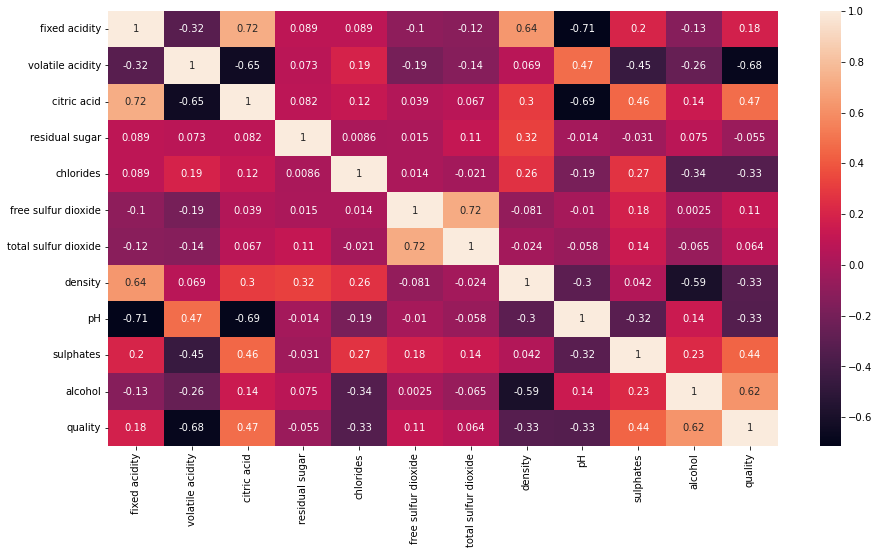

In [20]:
# heat map for co-relation analysis
plt.figure(figsize=(15,8))
ax4 = sns.heatmap(df_resample.corr(),annot=True)
ax4

In [21]:
# need to find the features that are fullu co-related
# this required to remove the features which are fully
# co-related to stop having negative impact on performance
# of model

for a in range(len(corr.columns)):
    for b in range(a):
        if abs(corr.iloc[a,b]) >0.7:
            name = corr.columns[a]
            print(name)


citric acid
total sulfur dioxide
pH


## **2. Data Pre-processing and cleaning**

### _Handling Missing data_

In [22]:
# Check for missing values

df_resample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4086 entries, 0 to 4085
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4086 non-null   float64
 1   volatile acidity      4086 non-null   float64
 2   citric acid           4086 non-null   float64
 3   residual sugar        4086 non-null   float64
 4   chlorides             4086 non-null   float64
 5   free sulfur dioxide   4086 non-null   float64
 6   total sulfur dioxide  4086 non-null   float64
 7   density               4086 non-null   float64
 8   pH                    4086 non-null   float64
 9   sulphates             4086 non-null   float64
 10  alcohol               4086 non-null   float64
 11  quality               4086 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 383.2 KB


**Observations:**
   - _There are no missing values_

### _Handling Imbalanced data_
While perfoming data Visualization we found out that data in imbalanced and we balanced data in that step only
for better co-relation analysis  
Click on this to go _[Class Imbalance Section](#class_imbalance)_

### _Feature Selection_ 1. Removing co-related features

While doing the co-relation analysis we found out that feature: _citric acid, total sulfur dioxide, pH_ are fully co-related other features hence droping them for better results

In [23]:
df_resample.drop(["citric acid", "total sulfur dioxide", "pH"],inplace=True,axis=1)

### _Feature Selection_ 2. Variance Threshold
We need to remove the features which are constant or nearly constant accross the data.  
for this we will be using sklearn variance threshold class

In [24]:
# Removing Constant and Quasi Constant Features
# Removing features who has variance below threshold 0.03
# by using threshold 0.03 we mean that dropping column where 
# 97% of values are similar

var_thres = VarianceThreshold(threshold=0.03)
var_thres.fit(df_resample)
# var_thres.get_support()

constant_columns = [col for col in df_resample.columns if col not in df_resample.columns[var_thres.get_support()] ]

print("Constant columns we can remove: ",constant_columns)

Constant columns we can remove:  ['chlorides', 'density', 'sulphates']


In [25]:
# Droping Constants and Quasi Constants
df_resample.drop(['chlorides', 'density', 'sulphates'], axis=1, inplace=True)

### _Finding and removing outliers_

_We will be using **boxplot** to visualize the outliers in all the feature_

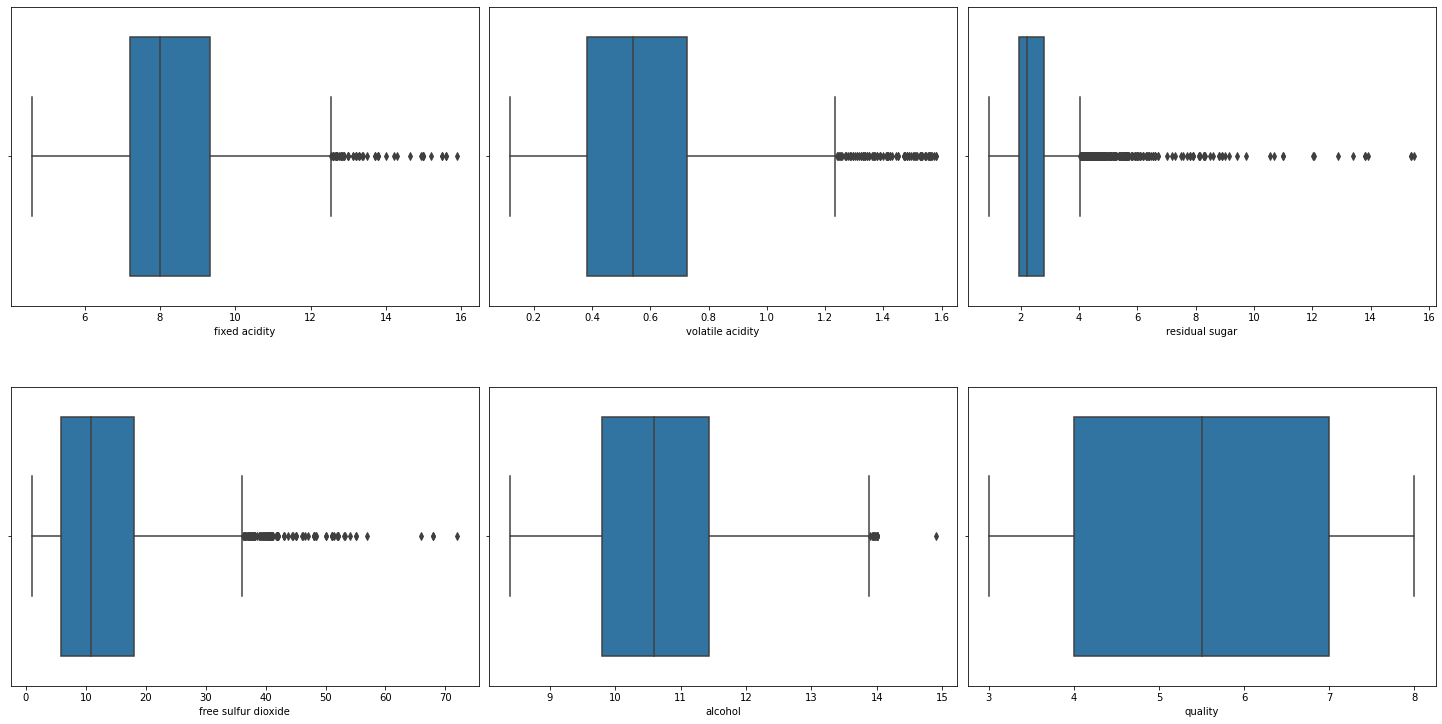

In [26]:
# Using blox plot to find the outliers
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df_resample.items():
    if col != 'type':
        sns.boxplot(x=col, data=df_resample, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [27]:
# find Skewness
df_resample.skew()

fixed acidity          0.774739
volatile acidity       1.074634
residual sugar         3.769072
free sulfur dioxide    1.387427
alcohol                0.540537
quality                0.000000
dtype: float64

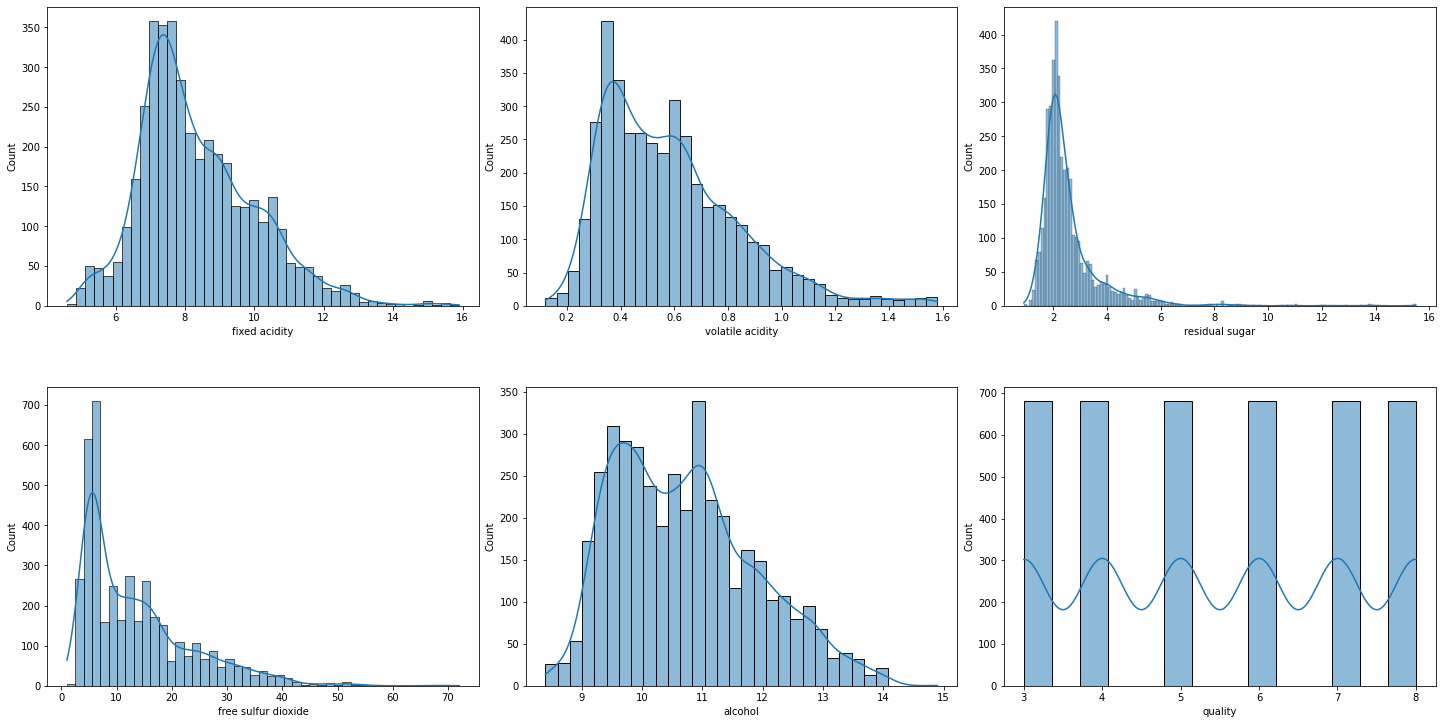

In [28]:
# Visualize shewness
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df_resample.items():
    if col != 'type':
        sns.histplot(value, ax=ax[index],kde=True)
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

**Observations:**
   - _We can see that there are outliers in few of the features_
   - _These outliers are due to the skewness of the data_
   - _We can normalize the data to remove the skewness hence removing outliers_

### _Applying log Transformation_

In [29]:
# Applying log transformation to the skewed columns

skew_col = ['residual sugar', 'free sulfur dioxide']
for col in skew_col:
    df_resample[col] = np.log(df_resample[col])

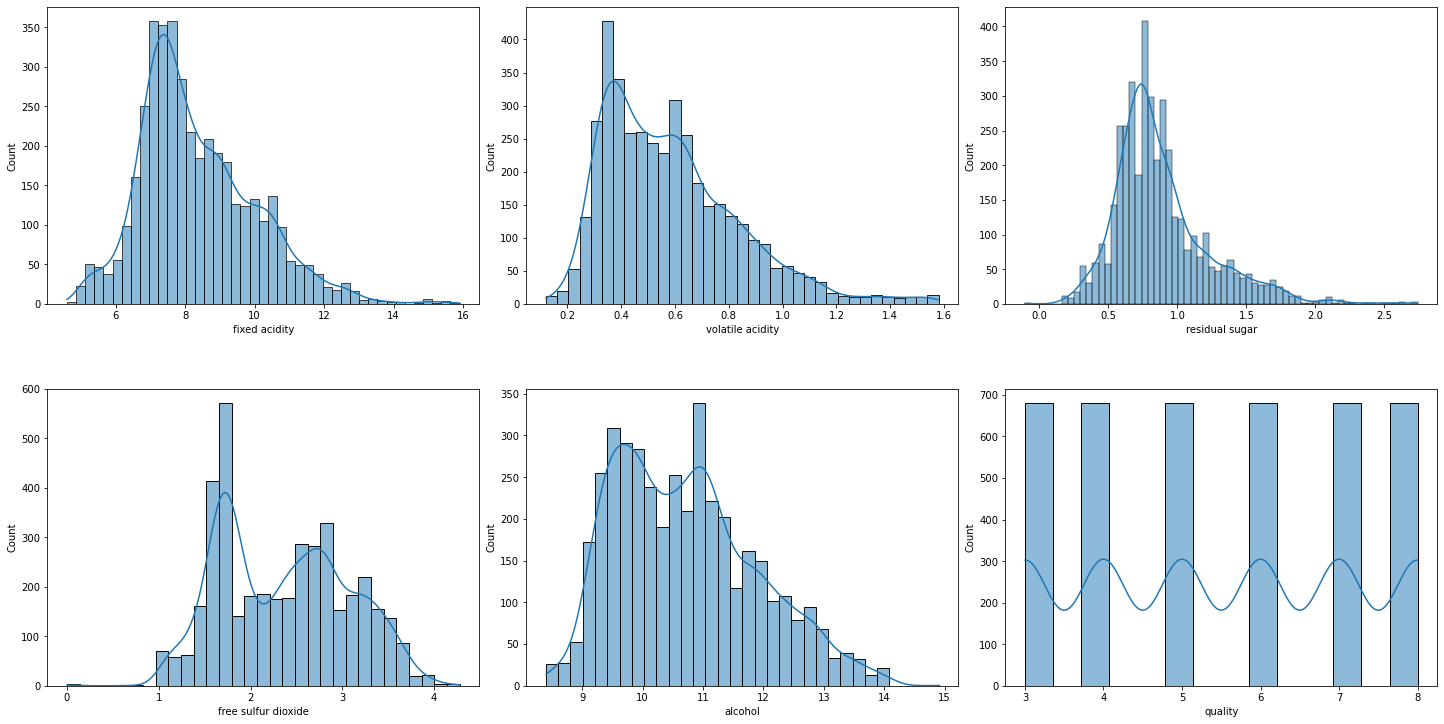

In [30]:
# Again Visualizing the skewness after applying log transformation
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df_resample.items():
    if col != 'type':
        sns.histplot(value, ax=ax[index],kde=True)
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [31]:
df_resample.skew()

fixed acidity          0.774739
volatile acidity       1.074634
residual sugar         1.305764
free sulfur dioxide    0.168719
alcohol                0.540537
quality                0.000000
dtype: float64

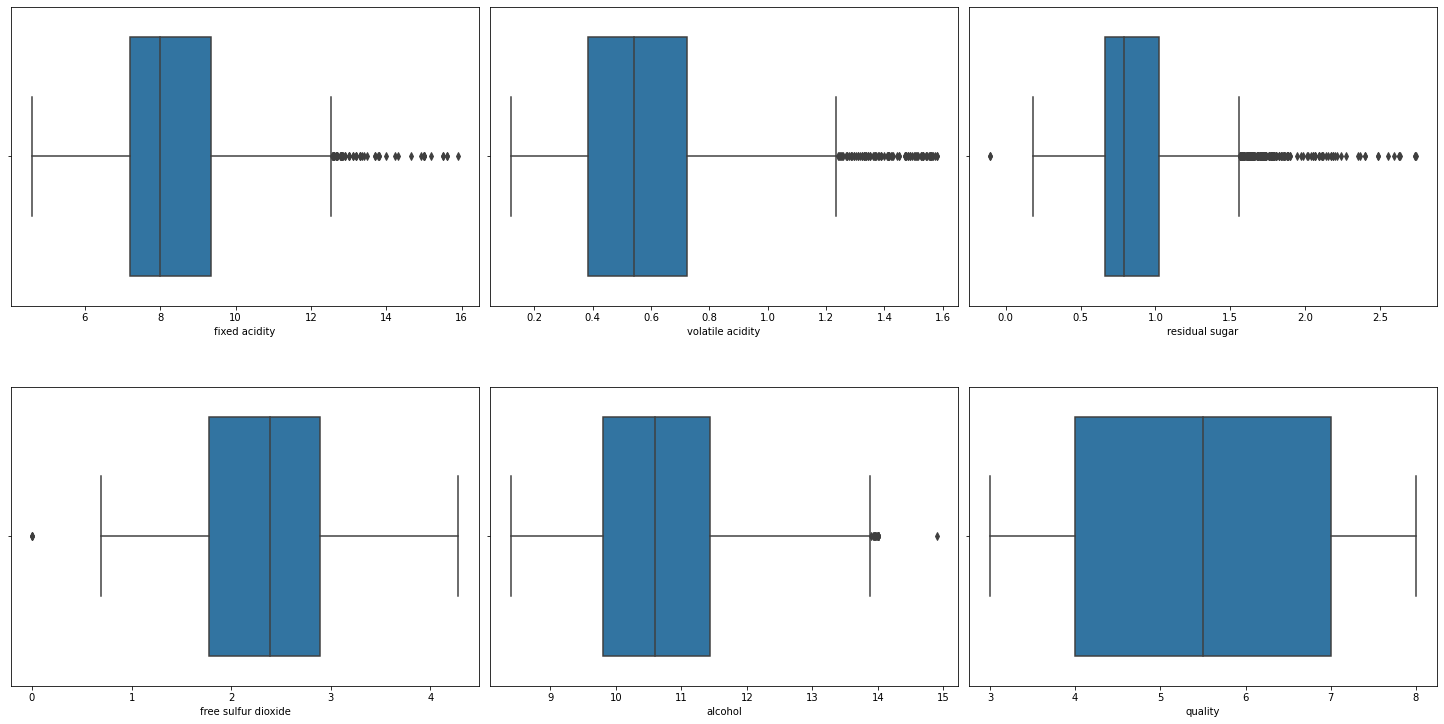

In [32]:
# Using blox plot to check for outliers after log transformation
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df_resample.items():
    if col != 'type':
        sns.boxplot(x=col, data=df_resample, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

**Observations:**
   - _By applying the log transformation we where able to remove most of the outliers_
   - _Still there are few outliers but we can ignore them_

## 3. Model Building

### _Split the dataset into training and test sets_

In [33]:
# Shuffle data rows 

# df_resample = df_resample.sample(frac=1)

# Split data into Features(X) and Target (y)
X = df_resample.iloc[:,:-1]
y = df_resample.iloc[:,-1]

# split data into Test and Train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)


In [34]:
# Print shape of data
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (3064, 5)
X_test shape: (1022, 5)
y_train shape: (3064,)
y_test shape: (1022,)


**Observations:**
   - _We split data in ratio of 3:1 that is 75% train data and 25% test data_

### Building Models
As stated in the assignment ruberics we will be using Decision tree and Knn to build the models

### KNN

In [35]:

# Initialize the classifier
clf_1 = KNeighborsClassifier(n_neighbors = 2)

# fir the model
clf_1.fit(X_train, y_train)

# Calculate Accuracy
clf_1_score = clf_1.score(X_test, y_test)

#print 
print("Accuracy Score:", clf_1_score)



Accuracy Score: 0.7377690802348337


### Decision Tree

In [36]:

# Initialize the classifier
clf_2 = DecisionTreeClassifier(random_state = 43)

# fit the model
clf_2.fit(X_train, y_train)

# Calculate Accuracy
clf_2_score = clf_2.score(X_test, y_test)

#print 
print("Accuracy Score:", clf_2_score)

Accuracy Score: 0.7211350293542075


### Hyper parameter tuning for KNN using GridSearchCV

In [37]:
# Creating the hyperparameter grid
k = [i for i in range(2,20)]
param_grid_clf_1 = {'n_neighbors': k}
 
# Instantiating KNN classifier
clf_1 = KNeighborsClassifier()
 
# Instantiating the GridSearchCV object
clf_1_cv = GridSearchCV(clf_1, param_grid_clf_1, cv = 5)
 
clf_1_cv.fit(X_train, y_train)
 
# Print the tuned parameters and score
print("Tuned KNN Parameters: {}".format(clf_1_cv.best_params_))
print("Best score is {}".format(clf_1_cv.best_score_))

Tuned KNN Parameters: {'n_neighbors': 2}
Best score is 0.7216107432641354


### Hyper parameter tuning for Decision Tree using GridSearchCV

In [38]:
# Creating the hyperparameter grid
param_grid_2 = {"max_depth": [3, None],
              "max_features": random.sample(range(1,9), 5),
              "min_samples_leaf": random.sample(range(1,9), 5),
              "criterion": ["gini", "entropy"]}
 
# Instantiating Decision Tree classifier
clf_2 = DecisionTreeClassifier()
 
# Instantiating the GridSearchCV object
clf_2_cv = GridSearchCV(clf_2, param_grid_2, cv = 5)
 
clf_2_cv.fit(X_train, y_train)
 
# Print the tuned parameters and score
print("Tuned DT Parameters: {}".format(clf_2_cv.best_params_))
print("Best score is {}".format(clf_2_cv.best_score_))

Tuned DT Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 3}
Best score is 0.6925588288605274


**Observations:**
   - Here we used Knn and DecisionTree classifier to classify the quality of wine
   - After feature selection we where left with only 5 features and one target with mulyiple class
   - In this case KNN is performing better as accuracy score of KNN is high
   - We used GridSearchCV class to find the best and optimal parameters for our classifiers
   

## 4. Performance Evaluation

We will using Accuracy, Confusion Matrix, F1-score, Recall and Precission to evaluate out model

In [40]:
# find KNN predictions
clf_1 = KNeighborsClassifier(n_neighbors= 2)
clf_1.fit(X_train, y_train)
clf_1_pred = clf_1.predict(X_test)

# find DT predictions
clf_2 = DecisionTreeClassifier(criterion= 'gini', max_depth= None, max_features= 5, min_samples_leaf= 2)
clf_2.fit(X_train, y_train)
clf_2_pred = clf_2.predict(X_test)


def get_evaluation_metrics(y_true,y_pred):
    """
    Takes the y_true and y_pred values and prints the set of metrics
    """
    print("Accuracy:",accuracy_score(y_true,y_pred))
#     print("F1_score:",f1_score(y_true,y_pred,pos_label=1))
#     print("Recall_score:",recall_score(y_true,y_pred,pos_label=1))
#     print("Precision:",precision_score(y_true,y_pred,pos_label=1))
    cf_matrix = confusion_matrix(y_true,y_pred)
    ax = sns.heatmap(cf_matrix, annot=True,fmt='d')

DT Evaluations
Accuracy: 0.6986301369863014
              precision    recall  f1-score   support

           3       0.84      0.92      0.88       165
           4       0.71      0.73      0.72       165
           5       0.59      0.64      0.61       185
           6       0.51      0.41      0.46       193
           7       0.64      0.65      0.65       147
           8       0.89      0.89      0.89       167

    accuracy                           0.70      1022
   macro avg       0.70      0.71      0.70      1022
weighted avg       0.69      0.70      0.69      1022



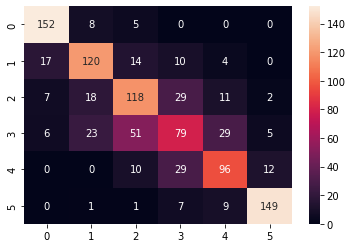

In [41]:
# Dt Evaluations:
print("DT Evaluations")
get_evaluation_metrics(y_test,clf_2_pred)
print(classification_report(y_test, clf_2_pred))

KNN Evaluations:
Accuracy: 0.7377690802348337
              precision    recall  f1-score   support

           3       0.84      0.99      0.91       165
           4       0.74      0.86      0.80       165
           5       0.54      0.61      0.57       185
           6       0.60      0.37      0.46       193
           7       0.78      0.73      0.76       147
           8       0.93      0.93      0.93       167

    accuracy                           0.74      1022
   macro avg       0.74      0.75      0.74      1022
weighted avg       0.73      0.74      0.73      1022



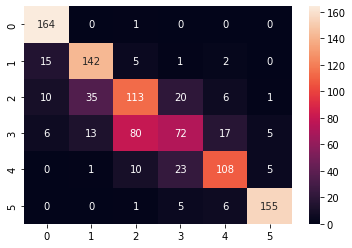

In [42]:
# KNN Evaluations:
print("KNN Evaluations:")
get_evaluation_metrics(y_test,clf_1_pred)
print(classification_report(y_test, clf_1_pred))

### Overfitting Vs Underfitting
   - **Overfitting:** A statistical model is said to be overfitted when the model does not make accurate predictions on testing data. When a model gets trained with so much data, it starts learning from the noise and inaccurate data entries in our data set. And when testing with test data results in High variance. _**In our case we have done a proper feature selection by removing all unwanted features and noise hence overfitting is not happening in our data**_
   - **Underfitting:** A statistical model or a machine learning algorithm is said to have underfitting when it cannot capture the underlying trend of the data, i.e., it only performs well on training data but performs poorly on testing data. _**We saw that our model is performing same on train data as well as test data hence our model is nor Underfitting**_
   - We can say that our model is Neither underfitting nor overfitting and it accurate with 74% 